In [1]:
import pandas as pd

In [3]:
sales_df = pd.read_csv("sales_data.csv")
product_df = pd.read_csv("product_info.csv")
customer_df = pd.read_csv("customer_info.csv")

In [77]:
sales_df['delivery_status'] = sales_df['delivery_status'].str.strip().str.title()
sales_df['payment_method'] = sales_df['payment_method'].str.strip().str.title()
sales_df['region'] = sales_df['region'].str.strip().str.title()

In [79]:
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], errors='coerce')

In [81]:
sales_df['discount_applied'] = sales_df['discount_applied'].fillna(0.0)

In [83]:
sales_df['quantity'] = pd.to_numeric(sales_df['quantity'], errors='coerce')
sales_df['quantity'] = pd.to_numeric(sales_df['unit_price'], errors='coerce')

In [85]:
sales_df = sales_df[(sales_df['quantity'] >= 0) & (sales_df['unit_price'] >= 0)]

In [87]:
sales_df = sales_df.drop_duplicates(subset='order_id')

In [89]:
print(sales_df.isnull().sum())

order_id            1
customer_id         2
product_id          5
quantity            0
unit_price          0
order_date          3
delivery_status     3
payment_method      3
region              0
discount_applied    0
dtype: int64


In [91]:
product_df['category'] = product_df['category'].str.strip().str.title()

In [93]:
product_df['launch_date'] = pd.to_datetime(product_df['launch_date'], errors='coerce')

In [95]:
product_df['supplier_code'] = product_df['supplier_code'].fillna("unknown")

In [69]:
product_df = product_df.drop_duplicates(subset='product_id')

In [99]:
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].str.strip().str.title()

In [105]:
customer_df['region'] = customer_df['region'].str.strip().str.title()

In [109]:
customer_df['signup_date'] = pd.to_datetime(customer_df['signup_date'], errors='coerce')

In [111]:
customer_df['email'] = customer_df['email'].str.strip()

In [113]:
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].fillna("Unknown")

In [115]:
customer_df['region'] = customer_df['region'].fillna("Unknown")

In [117]:
customer_df = customer_df.drop_duplicates(subset='customer_id')

In [121]:
merged_df = sales_df.merge(product_df, on='product_id', how='left')

In [125]:
merged_df = merged_df.merge(customer_df, on='customer_id', how='left')

In [127]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2996 non-null   object        
 1   customer_id       2995 non-null   object        
 2   product_id        2992 non-null   object        
 3   quantity          2997 non-null   float64       
 4   unit_price        2997 non-null   float64       
 5   order_date        2994 non-null   datetime64[ns]
 6   delivery_status   2994 non-null   object        
 7   payment_method    2994 non-null   object        
 8   region_x          2997 non-null   object        
 9   discount_applied  2997 non-null   float64       
 10  product_name      2992 non-null   object        
 11  category          2992 non-null   object        
 12  launch_date       2992 non-null   datetime64[ns]
 13  base_price        2992 non-null   float64       
 14  supplier_code     2992 n

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,39.25,39.25,2025-06-07,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,Female,North,Silver
1,O696648,C00236,P0023,18.92,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,Other,North,Gold
2,O202644,C00492,P0011,29.68,29.68,2025-06-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,32.76,32.76,2025-06-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,femle,Central,Gold
4,O322242,C00495,P0016,47.62,47.62,2025-06-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,male,Central,Gold


In [129]:
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price'] * (1 - merged_df['discount_applied'])

In [135]:
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week

In [139]:
merged_df['price_band'] = pd.cut(
    merged_df['unit_price'],
    bins=[-1, 15, 30, float('inf')],
    labels=["Low", "Medium", "High"]
)

In [143]:
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days

In [145]:
merged_df['email_domain'] = merged_df['email'].str.extract(r'@(.+)$')

In [147]:
merged_df['is_late'] = merged_df['delivery_status'] == "Delayed"

In [164]:
print(merged_df.columns)

Index(['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price',
       'order_date', 'delivery_status', 'payment_method', 'region_x',
       'discount_applied', 'product_name', 'category', 'launch_date',
       'base_price', 'supplier_code', 'email', 'signup_date', 'gender',
       'region_y', 'loyalty_tier', 'revenue', 'order_week', 'price_band',
       'days_to_order', 'email_domain', 'is_late'],
      dtype='object')


In [166]:
merged_df['region'] = merged_df['region_x'].str.strip().str.title()

In [186]:
merged_df['region'] = merged_df['region'].replace({
    'Nrth': 'North'
})

In [188]:
weekly_region_revenue = merged_df.groupby(['order_week', 'region'])['revenue'].sum().reset_index()
weekly_region_revenue.head()

,order_week,region,revenue
0,23,Central,526560.357365
1,23,East,544026.179445
2,23,North,551988.213850
3,23,South,549752.098850
4,23,West,526072.367215


In [190]:
weekly_region_pivot = weekly_region_revenue.pivot(index='order_week', columns='region', values='revenue')
weekly_region_pivot.head()

region,Central,East,North,South,West
order_week,,,,,
23,526560.357365,544026.179445,551988.21385,549752.09885,526072.367215


In [192]:
category_perf = merged_df.groupby('category').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'discount_applied': 'mean'
}).reset_index()
category_perf.head()                                       

,category,revenue,quantity,discount_applied
0,Cleaning,1.059421e+06,34447.27,0.085685
1,Kitchen,3.879881e+05,11982.56,0.075622
2,Outdoors,4.548850e+05,14632.96,0.082016
3,Personal Care,2.812782e+05,8982.56,0.086755
4,Storage,5.141322e+05,16557.87,0.080763


In [196]:
merged_df['signup_month'] = merged_df['signup_date'].dt.to_period('M')

In [200]:
customer_behaviour = merged_df.groupby(['loyalty_tier', 'signup_month']).agg({
    'revenue': 'sum',
    'order_id': 'nunique'
}).rename(columns={'order_id': 'num_orders'}).reset_index()
customer_behaviour.head

<bound method NDFrame.head of    loyalty_tier signup_month       revenue  num_orders
0         Brnze      2024-07   8372.698635           8
1         Brnze      2025-04   4204.306085           3
2        Bronze      2024-01   8732.578005          10
3        Bronze      2024-02  22105.645670          23
4        Bronze      2024-03  12176.015225          11
..          ...          ...           ...         ...
69       Silver      2025-10  12823.844770          10
70       Silver      2025-12   6058.770720          12
71       Sllver      2025-02   5271.087400           6
72      Unknown      2025-02   3309.158130           6
73      Unknown      2025-05   3142.085520           3

[74 rows x 4 columns]>

In [208]:
delivery_perf = merged_df.groupby(['region', 'price_band'], observed=True).agg({
    'is_late': 'mean',
    'order_id': 'count'
}).rename(columns={'is_late': 'late_rate', 'order_id': 'num_orders'}).reset_index()
delivery_perf['late_rate'] = delivery_perf['late_rate'].round(2)
delivery_perf.head()

,region,price_band,late_rate,num_orders
0,Central,Low,0.38,113
1,Central,Medium,0.39,225
2,Central,High,0.39,265
3,East,Low,0.42,96
4,East,Medium,0.42,238


In [216]:
payment_pref = merged_df.groupby(['loyalty_tier', 'payment_method'])['order_id'].count().reset_index()
payment_pref = payment_pref.rename(columns={'order_id': 'num_orders'})
payment_pref.head()

,loyalty_tier,payment_method,num_orders
0,Brnze,Bank Transfer,2
1,Brnze,Credit Card,5
2,Brnze,Paypal,4
3,Bronze,Bank Transfer,178
4,Bronze,Credit Card,278


In [294]:
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
plt.style.use=('seaborn-whitegrid')
sns.set_theme(
        context='notebook',
        style='whitegrid',
        palette='muted',
)   

<Figure size 1200x600 with 0 Axes>

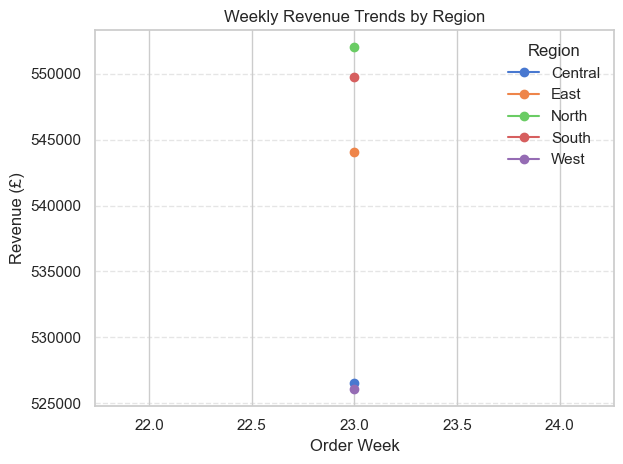

In [398]:
plt.figure(figsize=(12, 6))
weekly_region_pivot.plot(marker='o')
plt.title('Weekly Revenue Trends by Region')
plt.xlabel('Order Week')
plt.ylabel('Revenue (£)')
plt.legend(title='Region', frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("chart 2.png")
plt.show()

In [300]:
top_categories = merged_df.groupby('category')['revenue'].sum().nlargest(5).reset_index()

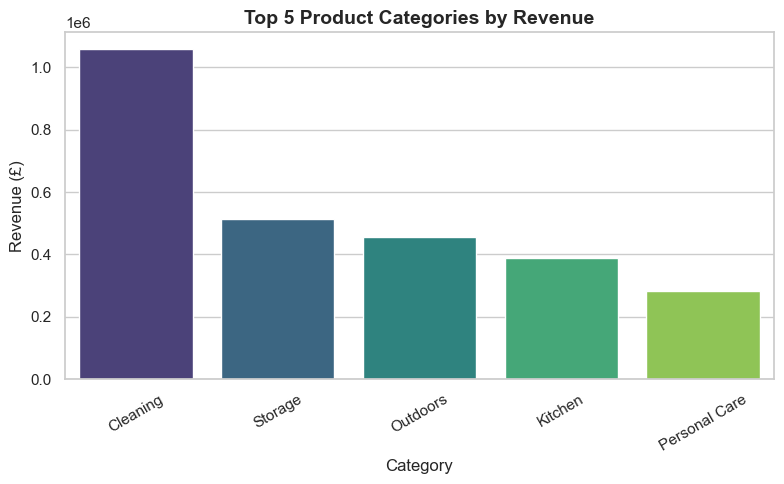

In [310]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top_categories, x='category', y='revenue', hue='category', palette='viridis', legend=False)
plt.title('Top 5 Product Categories by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

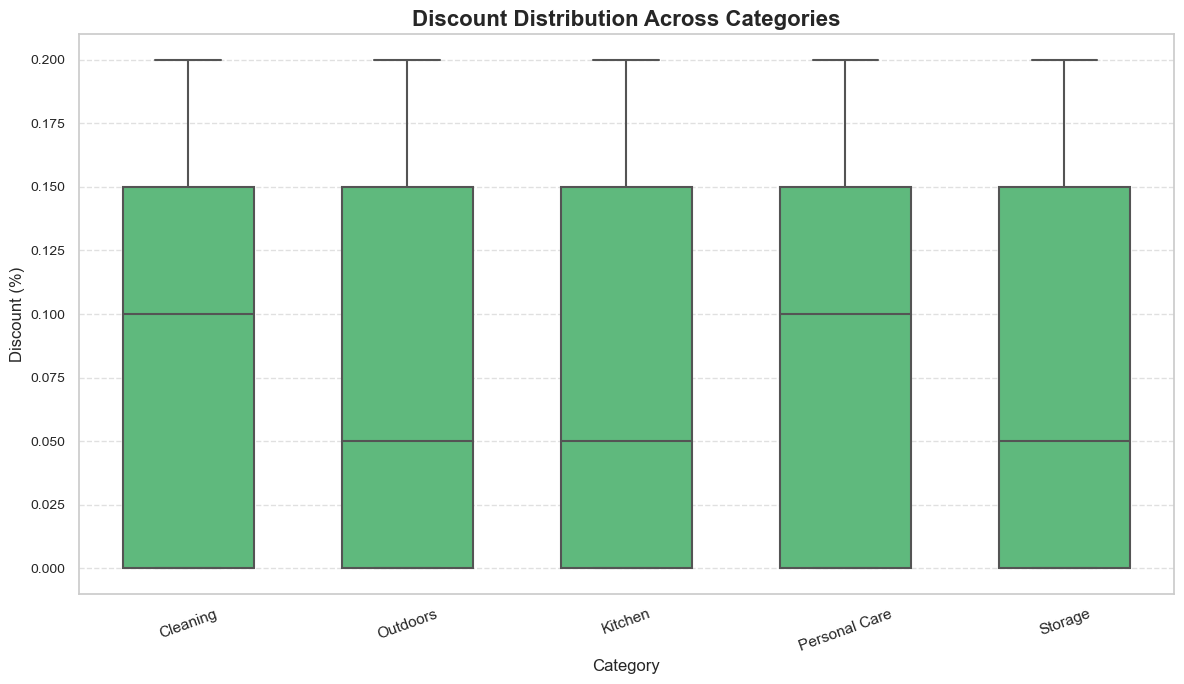

In [328]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=merged_df, 
    x='category', 
    y='discount_applied',
    color='#50c878',
    width=0.6,
    fliersize=2,
    linewidth=1.5
)
plt.title('Discount Distribution Across Categories', fontsize=16, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Discount (%)')
plt.xticks(rotation=20)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

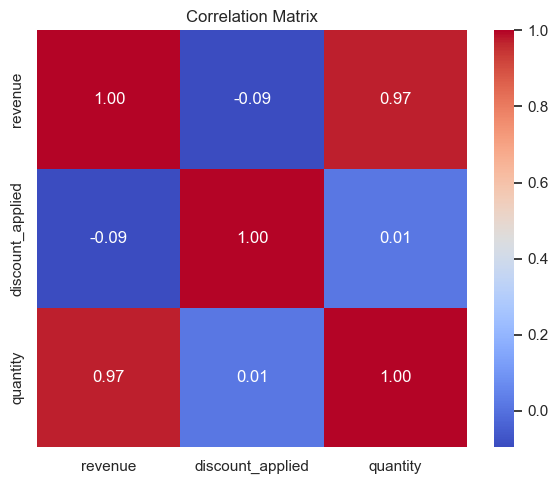

In [394]:
plt.figure(figsize=(6, 5))
corr_data = merged_df[['revenue', 'discount_applied', 'quantity']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig("chart.png")
plt.show()

In [330]:
merged_df['loyalty_tier'] = merged_df['loyalty_tier'].replace({
    'Sllver': 'Silver',
    'Gld': 'Gold',
    'Brnze': 'Bronze'
})

In [364]:
filtered_df = merged_df[merged_df['loyalty_tier'] != 'Unknown'].copy()

from pandas.api.types import CategoricalDtype

loyalty_order = CategoricalDtype(categories=['Bronze', 'Silver', 'Gold'], ordered=True)

filtered_df['loyalty_tier'] = filtered_df['loyalty_tier'].astype(loyalty_order)

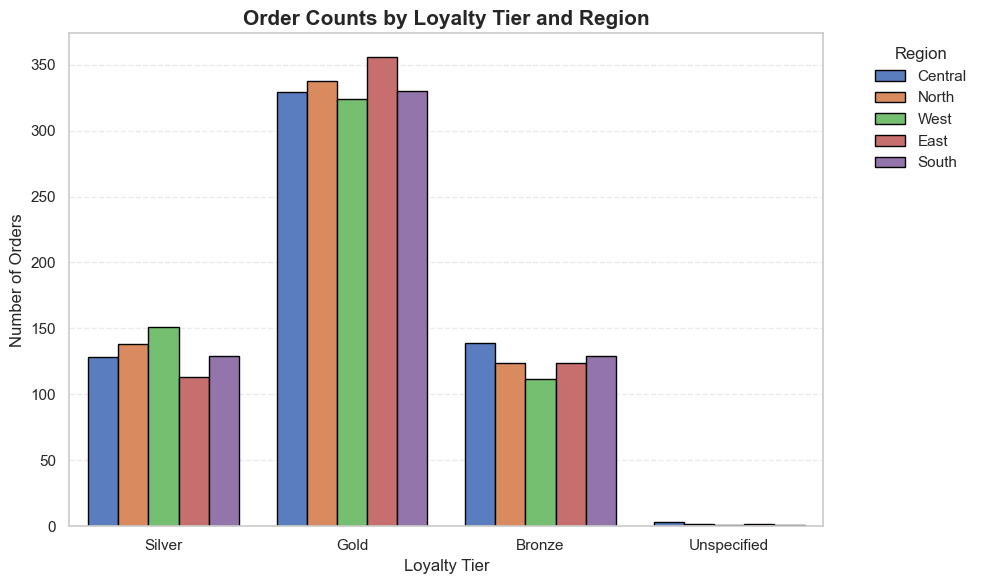

In [366]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=merged_df, 
    x='loyalty_tier', 
    hue='region',
    palette='muted',
    edgecolor='black'
)
plt.title('Order Counts by Loyalty Tier and Region', fontsize=15, fontweight='bold')
plt.xlabel('Loyalty Tier')
plt.ylabel('Number of Orders')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [254]:
merged_df['delivery_status'] = merged_df['delivery_status'].replace({
    'Delrd': 'Delayed',
    'Delyd': 'Delayed',
    'Dlivered': 'Delivered',
    'Cancelld': 'Cancelled'
})

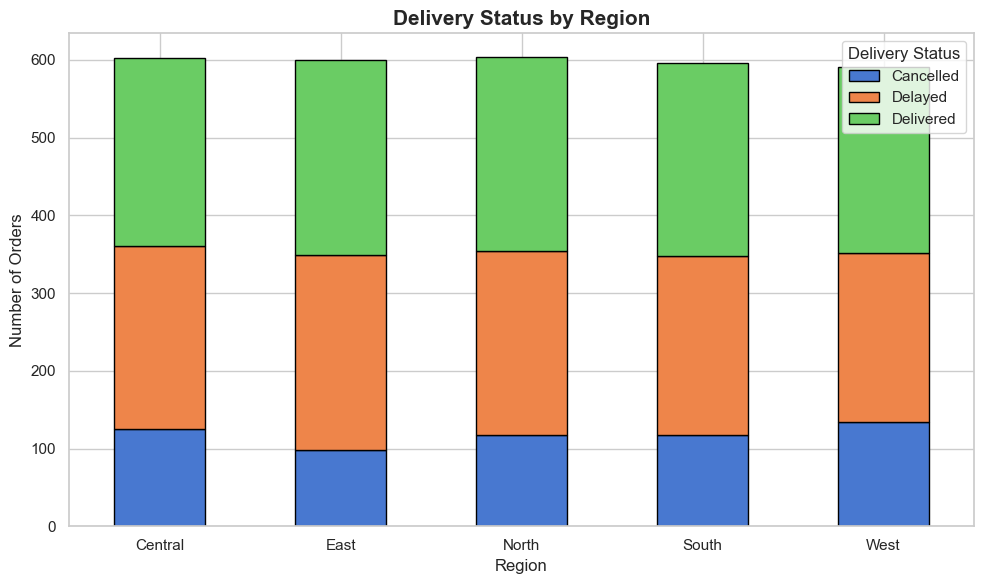

In [400]:
status_colors = {
    'Delivered': '#50c878',
    'Delated': '#ffa600',
    'Cancelled': '#bac5090'
}
colors = [status_colors.get(col, '#7f7f7f') for col in delivery_stack.columns]
delivery_stack = merged_df.groupby(
    ['region', 'delivery_status'], observed=True
)['order_id'].count().unstack().fillna(0)
delivery_stack.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='black')
plt.title('Delivery Status by Region', fontsize=15, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.savefig("chart 1.png")
plt.show()

In [376]:
category_region = merged_df.pivot_table(
    index='category',
    columns='region',
    values='revenue',
    aggfunc='sum'
).fillna(0).round(0)

category_region.loc[['Cleaning', 'Storage', 'Outdoors', 'Kitchen', 'Personal Care']]

region,Central,East,North,South,West
category,,,,,
Cleaning,195308.0,223502.0,223647.0,212774.0,204191.0
Storage,103511.0,112499.0,95133.0,94915.0,108074.0
Outdoors,94323.0,80975.0,99233.0,102829.0,77526.0
Kitchen,77534.0,69998.0,73190.0,86653.0,80613.0
Personal Care,59715.0,56723.0,60260.0,51439.0,53141.0


In [380]:
merged_df[['discount_applied', 'quantity', 'revenue']].corr()

,discount_applied,quantity,revenue
discount_applied,1.000000,0.014395,-0.094257
quantity,0.014395,1.000000,0.973556
revenue,-0.094257,0.973556,1.000000


In [384]:
loyalty_summary = merged_df.groupby('loyalty_tier').agg({
    'revenue': 'sum',
    'order_id': 'nunique'
}).rename(columns={'order_id': ' num_orders'}).round(0).sort_values(by='revenue', ascending=False)

print(loyalty_summary)

                revenue   num_orders
loyalty_tier                        
Gold          1539316.0         1677
Silver         581085.0          659
Bronze         561496.0          627
Unspecified      6451.0            9


In [388]:
delay_by_region = merged_df.groupby('region').agg(
    late_rate=('is_late', 'mean'),
    total_orders=('order_id', 'count')
).round(2).sort_values(by='late_rate', ascending=False)

print(delay_by_region)

         late_rate  total_orders
region                          
East          0.42           601
Central       0.39           603
North         0.39           605
South         0.39           596
West          0.37           591


In [392]:
merged_df['signup_month'] = merged_df['signup_date'].dt.to_period('M')
signup_summary = merged_df.groupby(['signup_month', 'loyalty_tier']).agg({
    'revenue': 'sum',
    'order_id': 'nunique'
}).rename(columns={'order_id': 'num_orders'}).round(0).reset_index()
print(signup_summary.head(10))

  signup_month loyalty_tier  revenue  num_orders
0      2024-01       Bronze   8733.0          10
1      2024-01         Gold  25355.0          25
2      2024-01       Silver  12991.0          16
3      2024-02       Bronze  22106.0          23
4      2024-02         Gold  13241.0          15
5      2024-02       Silver   5889.0           6
6      2024-03       Bronze  12176.0          11
7      2024-03         Gold  10423.0          11
8      2024-03       Silver  15496.0          23
9      2024-04       Bronze    627.0           1
